## Assignment: $k$ Means Clustering

## **Do two questions.**

`! git clone https://www.github.com/DS3001/kmc`

**Q1.** This question is a case study for $k$ means clustering.

1. Load the `airbnb_hw.csv` data. Clean `Price` along with `Beds`, `Number of Reviews`, and `Review Scores Rating`.
2. Maxmin normalize the data and remove any `nan`'s (`KMeans` from `sklearn` doesn't accept `nan` input).
3. Use `sklearn`'s `KMeans` module to cluster the data by `Beds`, `Number of Reviews`, and `Review Scores Rating` for `k=6`.
4. Use `seaborn`'s `.pairplot()` to make a grid of scatterplots that show how the clustering is carried out in multiple dimensions.
5. Use `.groupby` and `.describe` to compute the average price for each cluster. Which clusters have the highest rental prices?
6. Use a scree plot to pick the number of clusters and repeat steps 4 and 5.

Question 1: Part 1

In [262]:
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

df = pd.read_csv('kmc/data/airbnb_hw.csv')
df.head()

,Host Id,Host Since,Name,Neighbourhood,Property Type,Review Scores Rating (bin),Room Type,Zipcode,Beds,Number of Records,Number Of Reviews,Price,Review Scores Rating
0,5162530,NaN,1 Bedroom in Prime Williamsburg,Brooklyn,Apartment,NaN,Entire home/apt,11249.0,1.0,1,0,145,NaN
1,33134899,NaN,"Sunny, Private room in Bushwick",Brooklyn,Apartment,NaN,Private room,11206.0,1.0,1,1,37,NaN
2,39608626,NaN,Sunny Room in Harlem,Manhattan,Apartment,NaN,Private room,10032.0,1.0,1,1,28,NaN
3,500,6/26/2008,Gorgeous 1 BR with Private Balcony,Manhattan,Apartment,NaN,Entire home/apt,10024.0,3.0,1,0,199,NaN
4,500,6/26/2008,Trendy Times Square Loft,Manhattan,Apartment,95.0,Private room,10036.0,3.0,1,39,549,96.0


In [263]:
#df['Price'].unique()

df['Price'] = df['Price'].str.replace(',', '')
df['Price'] = pd.to_numeric(df['Price'], errors = 'coerce')

In [264]:
#df['Beds'].unique()

average_beds = df['Beds'].mean()
print(average_beds)

#Do not want decimal so ill just fill Na with 1
df['Beds'] = df['Beds'].fillna(1)

1.5300891652683184


In [265]:
df['Number Of Reviews'].unique()
#Is good

array([  0,   1,  39,   4,   9,  80,  95,  23,  14, 120,  81,  17,  32,
        52,   3, 171,  16,  19,   2,  28,  62,   6,   5,  12,  40,  47,
        13,  35,  34,  68,  42,   7,  41,  15,  21,   8,  10,  29, 112,
        25, 132,  51, 156,  30,  98,  24,  74,  20, 188, 221,  57,  11,
       242,  67, 118,  60, 136, 119,  79, 106,  43,  91, 105,  96, 141,
       146,  63,  58,  18, 150,  38,  55,  89,  46,  77,  48,  36,  69,
        26,  73,  53, 165,  92,  87, 108, 109,  50, 127,  88,  83, 184,
       179,  22,  31,  82,  27, 123, 247, 190, 257, 217,  85, 103, 157,
       102,  56, 125, 115,  49,  97,  54,  65,  90,  44,  33, 100,  37,
       107, 114, 116,  61, 104,  71,  75, 145,  84,  93, 110, 172, 148,
       131, 154,  86,  64,  76, 129,  45, 180, 140,  78, 200, 175, 189,
       170, 187,  72, 137,  99, 101,  59,  94, 124, 223, 173, 151, 142,
       163, 121, 256, 248, 149, 128, 133,  66, 117, 176, 111,  70, 183,
       218, 192, 206, 161, 216, 191, 213, 178, 122, 153, 177, 16

In [266]:
df['Review Scores Rating'].unique()


new_df = df.loc[:, ['Price', 'Beds', 'Review Scores Rating', 'Number Of Reviews']]
new_df = new_df.dropna()

#df.head()

Question 1: Part 2

In [267]:
def maxmin(x):
    ans = (x-min(x))/(max(x)-min(x))
    return ans

#Inherently bigger numbers will exert more influence so will maxmin
#To perserve original price create new dataframe with just stuff we are looking at
df_no_price = new_df.drop("Price", axis = 1)
df_maxmin = df_no_price.apply(maxmin)

df_maxmin.head()

,Beds,Review Scores Rating,Number Of Reviews
4,0.1875,0.950,0.148438
5,0.0625,1.000,0.011719
6,0.0625,1.000,0.031250
7,0.0625,0.925,0.308594
8,0.1250,0.875,0.367188


Question 1: Part 3

In [268]:
model = KMeans(n_clusters = 6, max_iter = 500, n_init = 10, random_state = 1)
model = model.fit(df_maxmin)

#df_maxmin['sol'] = model.predict(df_maxmin)
#Instead used labels according to handout
df_maxmin['Cluster_val'] = model.labels_

df_maxmin.head(5)

,Beds,Review Scores Rating,Number Of Reviews,Cluster_val
4,0.1875,0.950,0.148438,2
5,0.0625,1.000,0.011719,1
6,0.0625,1.000,0.031250,1
7,0.0625,0.925,0.308594,4
8,0.1250,0.875,0.367188,4


Question 1: Part 4

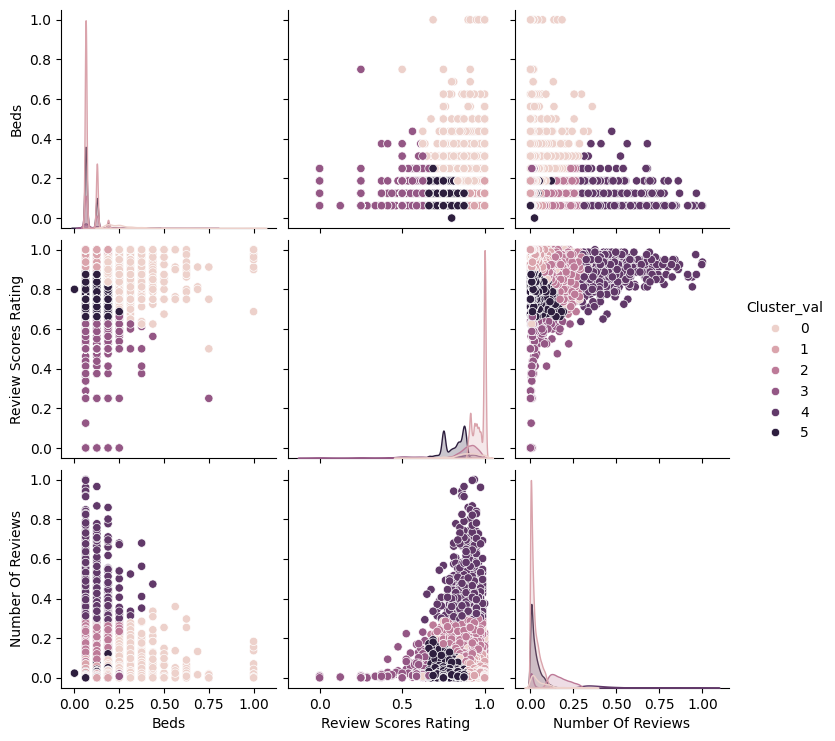

In [269]:
sns.pairplot(data = df_maxmin, hue = 'Cluster_val')
#Visualizes where our groups are- we defined to have 6 and this is how they are dispearsed across the variables

Question 1: Part 5

In [270]:
new_df["Cluster_val"] = model.labels_
df_predict = new_df.loc[: , ['Price', 'Cluster_val']].groupby('Cluster_val')
df_predict.describe()

Price                                                       \
               count        mean         std   min     25%    50%     75%   
Cluster_val                                                                 
0             1627.0  293.440688  262.877909  27.0  150.00  229.0  350.00   
1            10518.0  152.230937  147.251046  10.0   85.00  130.0  190.00   
2             3026.0  141.720423   84.187224  22.0   87.25  125.0  175.00   
3              658.0  133.379939  211.898044  25.0   65.00   99.0  153.75   
4              794.0  133.238035   83.077776  27.0   80.00  110.0  168.50   
5             5532.0  131.656905  102.802047  20.0   75.00  110.0  169.00   

                      
                 max  
Cluster_val           
0             4500.0  
1            10000.0  
2             1000.0  
3             5000.0  
4              875.0  
5             5000.0

Within my clusters at random state equal to 1 cluster 0 has by var the highest average price per listing at around \$300 a night. Cluster 5 has the lowest at \$131 a night.

Question 1: Part 6

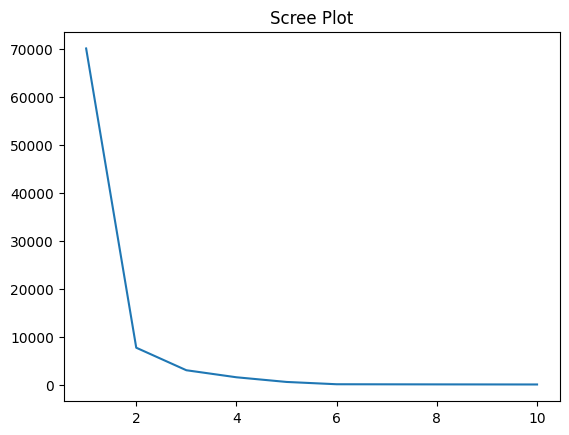

In [271]:
k_bar = 10
k_grid = np.arange(1, k_bar + 1)

SSE = np.zeros(k_bar)

for k in range(k_bar):
  model = KMeans(n_clusters = k + 1, max_iter = 300, n_init = 10, random_state = 1)
  model = model.fit(df_maxmin)
  SSE[k] = model.inertia_

#scree_plot = sns.lineplot(x = k_grid, y = SSE).set_title('Scree Plot')

Price                                                    \
               count        mean         std   min   25%    50%    75%   
Cluster_val                                                              
0            15171.0  165.278426  160.757336  10.0  90.0  135.0  199.0   
1             6984.0  131.998998  115.669885  20.0  75.0  110.0  169.0   

                      
                 max  
Cluster_val           
0            10000.0  
1             5000.0

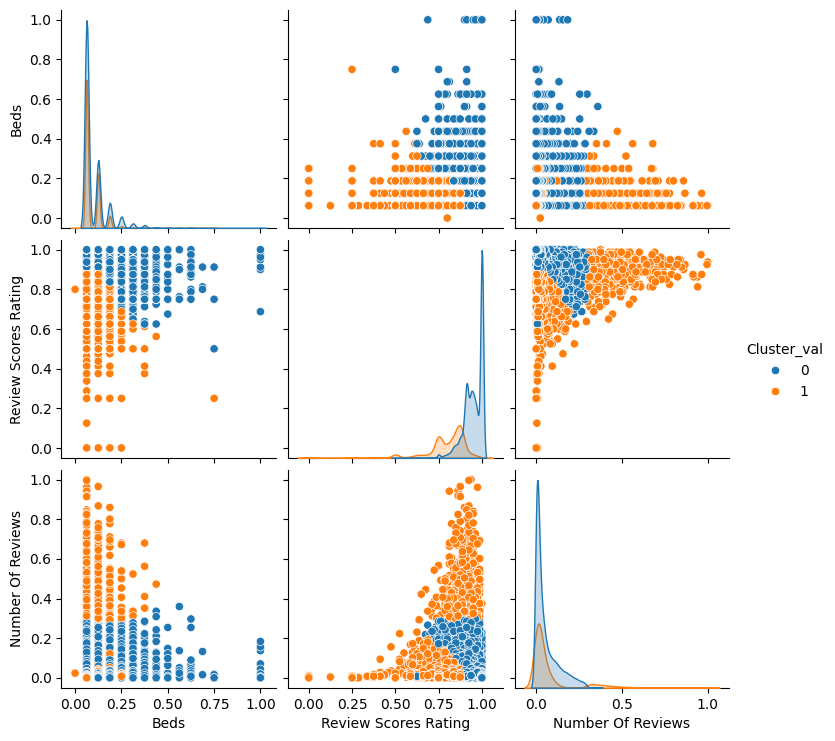

In [282]:
#A k of 2 looks pretty good to test based on the above graph as its when the SSE has an elbow
model = KMeans(n_clusters = 2, max_iter = 500, n_init = 10, random_state = 1)
model = model.fit(df_maxmin)

#df_maxmin['sol'] = model.predict(df_maxmin)
#Instead used labels according to handout
df_maxmin['Cluster_val'] = model.labels_

#df_maxmin.head(5)

sns.pairplot(data = df_maxmin, hue = 'Cluster_val')

new_df["Cluster_val"] = model.labels_
df_predict = new_df.loc[: , ['Price', 'Cluster_val']].groupby('Cluster_val')
df_predict.describe()

As seen in the graph above it appears that cluster 1 has values a lot more spread out in the data, where as cluster 0 is associated primarily with the areas on the plot where data is most dense. For cluster 0 the data is very close together but those data points appear very frequently. With cluster 1, the data is more spread out, but the data is less dense. Also, because there are fewer clusters the average price of both clusters is more moderate / closer to the mean  \( \$165 for cluster 0 vs \$131 for cluster 1\)

**Q2.** This is a question about $k$ means clustering. We want to investigate how adjusting the "noisiness" of the data impacts the quality of the algorithm and the difficulty of picking $k$.

1. Run the code below, which creates four datasets: `df0_125`, `df0_25`, `df0_5`, `df1_0`, and `df2_0`. Each data set is created by increasing the amount of `noise` (standard deviation) around the cluster centers, from `0.125` to `0.25` to `0.5` to `1.0` to `2.0`.

```
import numpy as np
import pandas as pd

def createData(noise,N=50):
    np.random.seed(100) # Set the seed for replicability
    # Generate (x1,x2,g) triples:
    X1 = np.array([np.random.normal(1,1,N),np.random.normal(1,1,N)])
    X2 = np.array([np.random.normal(3,1,N),np.random.normal(2,1,N)])
    X3 = np.array([np.random.normal(5,1,N),np.random.normal(3,1,N)])
    # Concatenate into one data frame
    gdf1 = pd.DataFrame({'x1':X1[0,:],'x2':X1[1,:],'group':'a'})
    gdf2 = pd.DataFrame({'x1':X2[0,:],'x2':X2[1,:],'group':'b'})
    gdf3 = pd.DataFrame({'x1':X3[0,:],'x2':X3[1,:],'group':'c'})
    df = pd.concat([gdf1,gdf2,gdf3],axis=0)
    return df

df0_125 = createData(0.125)
df0_25 = createData(0.25)
df0_5 = createData(0.5)
df1_0 = createData(1.0)
df2_0 = createData(2.0)
```

2. Make scatterplots of the $(X1,X2)$ points by group for each of the datasets. As the `noise` goes up from 0.125 to 2.0, what happens to the visual distinctness of the clusters?
3. Create a scree plot for each of the datasets. Describe how the level of `noise` affects the scree plot (particularly the presence of a clear "elbow") and your ability to definitively select a $k$.
4. Explain the intuition of the elbow, using this numerical simulation as an example.

Question 2: Part 1

In [273]:
#Code differend on solutions handout and in assignment handout
#Assignment handout did not give graphs that matched the intuitive answers so I used the other

def createData(noise,N=50):
    np.random.seed(100) # Set the seed for replicability
    # Generate (x1,x2,g) triples:
    X1 = np.array([np.random.normal(1,noise,N),np.random.normal(1,noise,N)])
    X2 = np.array([np.random.normal(3,noise,N),np.random.normal(2,noise,N)])
    X3 = np.array([np.random.normal(5,noise,N),np.random.normal(3,noise,N)])
    # Concatenate into one data frame
    gdf1 = pd.DataFrame({'x1':X1[0,:],'x2':X1[1,:],'group':'a'})
    gdf2 = pd.DataFrame({'x1':X2[0,:],'x2':X2[1,:],'group':'b'})
    gdf3 = pd.DataFrame({'x1':X3[0,:],'x2':X3[1,:],'group':'c'})
    df = pd.concat([gdf1,gdf2,gdf3],axis=0)
    return df

df0_125 = createData(0.125)
df0_25 = createData(0.25)
df0_5 = createData(0.5)
df1_0 = createData(1.0)
df2_0 = createData(2.0)

Question 2: Part 2

<Axes: xlabel='x1', ylabel='x2'>

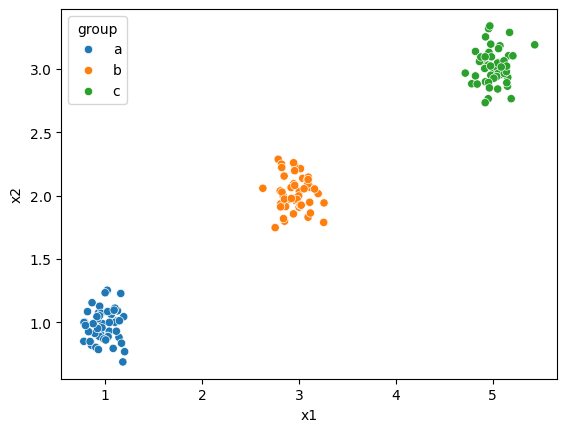

In [274]:
#Scatter splot for noise level of 0.125
sns.scatterplot(data = df0_125, hue = "group", x = "x1", y = "x2")

<Axes: xlabel='x1', ylabel='x2'>

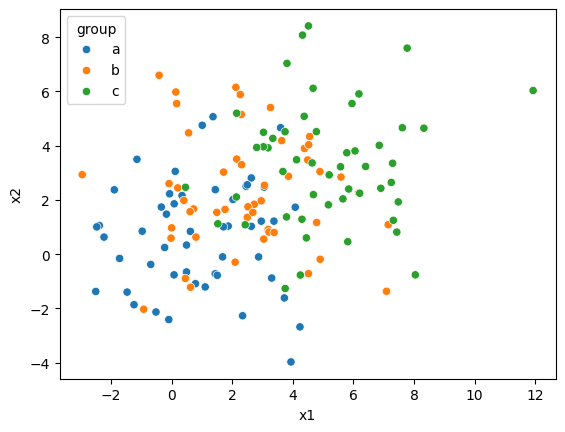

In [275]:
sns.scatterplot(data = df2_0, hue = 'group', x = "x1", y = "x2")

As you increase the noise the clusters become less defined and concentrated. As seen above, the points are more spread out in space and there are instances where a green point, for example, can be found close to the concentration of blue points. This does not happen with less noise, as the groups are kept entirely apart.

Question 2: Part 3

In [276]:
def createPlot(provided_df):
  k_bar = 10
  k_grid = np.arange(1, k_bar + 1)

  SSE = np.zeros(k_bar)

  for k in range(k_bar):
    model = KMeans(n_clusters = k + 1, max_iter = 300, n_init = 10, random_state = 1)
    model = model.fit(provided_df)
    SSE[k] = model.inertia_

  scree_plot = sns.lineplot(x = k_grid, y = SSE).set_title('Scree Plot')

Data frame with 0.125 noise


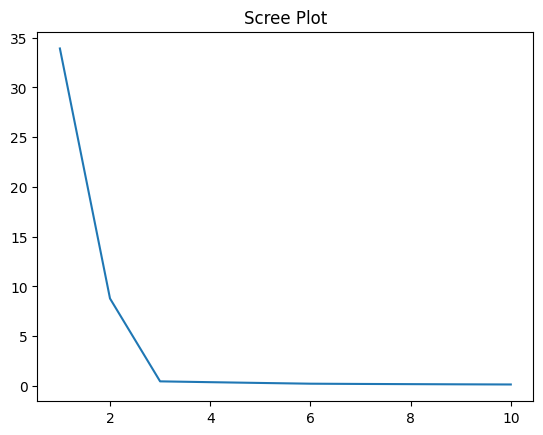

In [277]:
cur_df = df0_125.loc[ : , ["x1", "x2"]]
cur_df = cur_df.apply(maxmin)

print("Data frame with 0.125 noise")
createPlot(cur_df)


Data frame with 0.25 noise


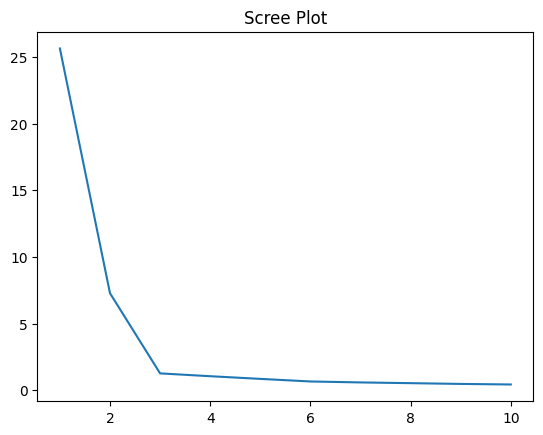

In [278]:
cur_df = df0_25.loc[ : , ["x1", "x2"]]
cur_df = cur_df.apply(maxmin)

print("Data frame with 0.25 noise")
createPlot(cur_df)

Data frame with 0.5 noise


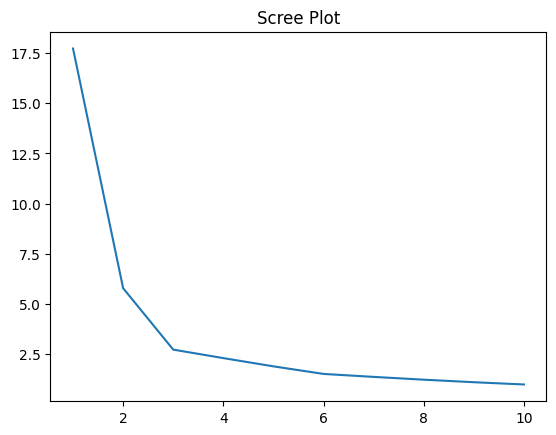

In [279]:
cur_df = df0_5.loc[ : , ["x1", "x2"]]
cur_df = cur_df.apply(maxmin)

print("Data frame with 0.5 noise")
createPlot(cur_df)

Data frame with 1.0 noise


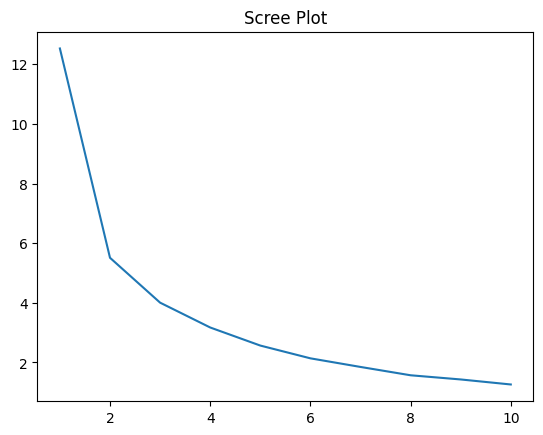

In [280]:

cur_df = df1_0.loc[ : , ["x1", "x2"]]
cur_df = cur_df.apply(maxmin)

print("Data frame with 1.0 noise")
createPlot(cur_df)

Data frame with 2.0 noise


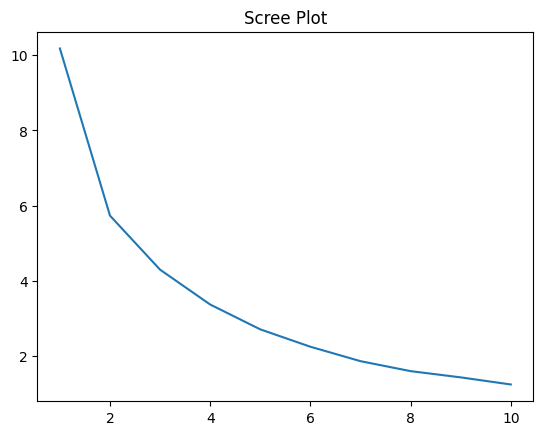

In [281]:

cur_df = df2_0.loc[ : , ["x1", "x2"]]
cur_df = cur_df.apply(maxmin)

print("Data frame with 2.0 noise")
createPlot(cur_df)

As the amount of noise increases the Scree plot gets increasingly curved. There is less of a distinct sharp elbow present within the plot at higher noise levels. For the lower levels of noise a value of 3 appears to be an elbow but at higher levels of noise no clear elbow is present.

Question 2: Part 4

There is a clear presence of an elbow at lower noise levels. In the graph with the lowest noise, for example, there are three distinct groups. As a result, in the scree plot it is evident that from values 0 to 3 the SSE drops off significantly, and moderates its pace of descent after. In graphs with more noise, as you increase the number of groups, the pace of decrease in SSE is not as significant \(hence a more smooth / curved scree plot\). This is because grouping becomes less effective as the points start to intermix between groups.


**Q3.** We looked at computer vision with $k$NN in a previous question. Can $k$ means clustering correctly group digits, even if we don't know which symbols are which?

1. To load the data, run the following code in a chunk:
```
from keras.datasets import mnist
df = mnist.load_data('minst.db')
train,test = df
X_train, y_train = train
X_test, y_test = test
```
The `y_test` and `y_train` vectors, for each index `i`, tell you want number is written in the corresponding index in `X_train[i]` and `X_test[i]`. The value of `X_train[i]` and `X_test[i]`, however, is a 28$\times$28 array whose entries contain values between 0 and 256. Each element of the matrix is essentially a "pixel" and the matrix encodes a representation of a number. To visualize this, run the following code to see the first ten numbers:
```
import matplotlib.pyplot as plt
import numpy as np
np.set_printoptions(edgeitems=30, linewidth=100000)
for i in range(5):
    print(y_test[i],'\n') # Print the label
    print(X_test[i],'\n') # Print the matrix of values
    plt.contourf(np.rot90(X_test[i].transpose())) # Make a contour plot of the matrix values
    plt.show()
```
OK, those are the data: Labels attached to handwritten digits encoded as a matrix.

2. What is the shape of `X_train` and `X_test`? What is the shape of `X_train[i]` and `X_test[i]` for each index `i`? What is the shape of `y_train` and `y_test`?
3. Use Numpy's `.reshape()` method to covert the training and testing data from a matrix into an vector of features. So, `X_test[index].reshape((1,784))` will convert the $index$-th element of `X_test` into a $28\times 28=784$-length row vector of values, rather than a matrix. Turn `X_train` into an $N \times 784$ matrix $X$ that is suitable for scikit-learn's kNN classifier where $N$ is the number of observations and $784=28*28$ (you could use, for example, a `for` loop).
4. Use $k$ means clustering on the reshaped `X_test` data with `k=10`.  
5. Cross tabulate the cluster assignments with the true labels for the test set values. How good is the correspondence? What proportion of digits are clustered correctly? Which digits are the hardest to distinguish from one another? Can $k$MC recover the latent digits 0 to 9, without even knowing what those digits were?
6. If you use a scree plot to determine the number of clusters $k$, does it pick 10 (the true number of digits), or not? If it fails to pick $k=10$, which digits does it tend to combine into the same classification?